#Downloads

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Dataframes

In [15]:
df = pd.read_csv('/content/drive/MyDrive/tech-stock-2019-2024.csv')
temp = pd.to_datetime(df['Date'])
df['Days_since_start'] = (temp - pd.to_datetime('2019-01-01')).dt.days
df['Open-Close'] = df['Open'] - df['Close']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Days_since_start,Open-Close
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,37.793785,148158800,AAPL,1,-0.757500
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.029243,365248800,AAPL,2,0.447498
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.481926,234428400,AAPL,3,-0.932499
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.402950,219111200,AAPL,6,0.192501
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.077847,164101200,AAPL,7,-0.297501


In [16]:
avg_df = df.drop(['Ticker','Date'],axis=1)
avg_df = avg_df.groupby('Days_since_start').mean()
avg_df = avg_df.reset_index()
dates = df.groupby('Days_since_start')['Date'].first().reset_index()
avg_df = avg_df.merge(dates, on='Days_since_start')

avg_df.head()

,Days_since_start,Open,High,Low,Close,Adj Close,Volume,Open-Close,Date
0,1,56.659835,58.635734,56.345601,58.193034,56.754391,109979420.0,-1.533199,2019-01-02
1,2,57.019134,57.491934,55.699866,55.851800,54.487158,138755580.0,1.167334,2019-01-03
2,3,56.976100,58.909500,56.564099,58.569466,57.142457,123814900.0,-1.593367,2019-01-04
3,6,58.885400,59.757965,58.245967,59.328933,57.901255,115069060.0,-0.443533,2019-01-07
4,7,60.152366,60.671400,58.977866,59.988335,58.546555,102757020.0,0.164031,2019-01-08


In [17]:
election_df = avg_df[avg_df['Date'].str[:4]=="2020"]
election_df['Days_since_start'] = election_df['Days_since_start'] -365
election_df.head()

,Days_since_start,Open,High,Low,Close,Adj Close,Volume,Open-Close,Date
252,1,84.462099,85.585565,84.154700,85.545198,83.823233,81788400.0,-1.083099,2020-01-02
253,2,84.519835,85.671832,84.380799,84.867197,83.165392,106562500.0,-0.347363,2020-01-03
254,5,84.094734,85.858901,83.916166,85.823433,84.114590,83839980.0,-1.728699,2020-01-06
255,6,86.057602,86.441301,85.218802,85.709335,84.014093,102793120.0,0.348267,2020-01-07
256,7,85.888598,87.257034,85.481766,86.709467,84.987294,146492840.0,-0.820868,2020-01-08


#Graph

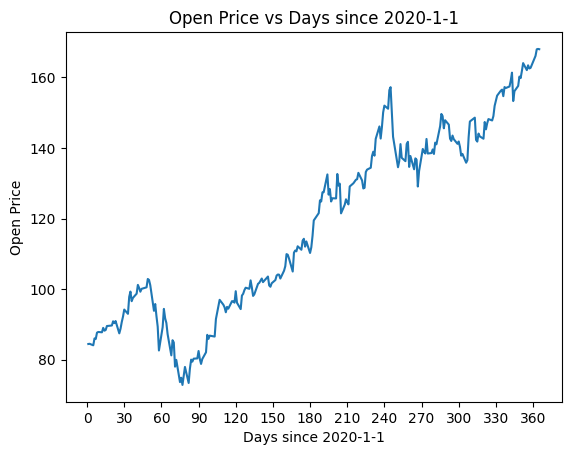

In [14]:
plt.plot(election_df['Days_since_start'], election_df['Open'])
plt.xticks(np.arange(0, 365, 30))
plt.xlabel('Days since 2020-1-1')
plt.ylabel('Open Price')
plt.title('Open Price vs Days since 2020-1-1')
plt.show()

#Baseline model

In [18]:
inputs = election_df['Days_since_start'].values.reshape(-1,1)
output = election_df['Open'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

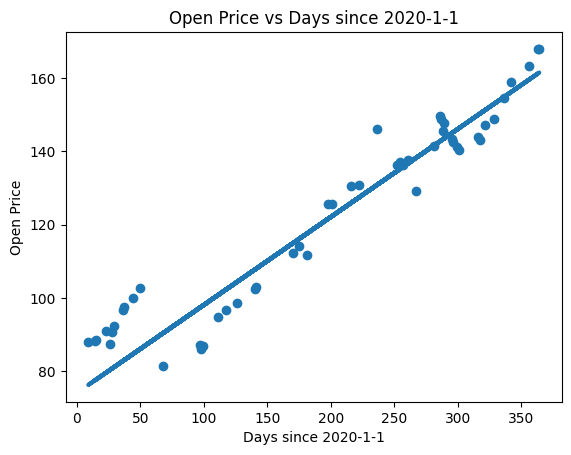

In [28]:
plt.scatter(X_test, y_test)
plt.plot(X_test, predictions, linewidth=3)
plt.xlabel('Days since 2020-1-1')
plt.ylabel('Open Price')
plt.title('Open Price vs Days since 2020-1-1')
plt.show()

In [31]:
print("R-squared: " + str(r2_score(y_test, predictions)))
print("Mean Squared Error: " + str(mean_squared_error(y_test, predictions)))
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, predictions)))

R-squared: 0.9108151310405356
Mean Squared Error: 61.132570301051565
Mean Absolute Error: 6.532664182467559
